# Using Convolutional Neural Networks for Electron Microscopy Image Restoration

Notebook Author: Zezhong Zhang

For paper: Lobato, I., Friedrich, T., & Van Aert, S. (2023). Deep convolutional neural networks to restore single-shot electron microscopy images. arXiv preprint arXiv:2303.17025.

Content: This tutorial introduces TensorFlow CNN operations, the network Architecture via a mini example for denoising hand written numbers and the use of pretrained models for processing electron microscopy images.

License: [CC-BY 4.0 International License](https://joinup.ec.europa.eu/licence/creative-commons-attribution-40-international-cc-40).

## Introduction

Convolutional Neural Networks (CNNs) are a type of artificial neural network commonly used for image analysis and computer vision tasks. They are designed to receive input data in the form of images and process the data through multiple layers, each applying a set of different filters to extract various features.

In the context of image restoration, CNNs can be trained to learn the mapping between distorted and clear images. The network takes a distorted image as input and produces a restored image as output. The training process involves providing the network with pairs of distorted and clear images and adjusting the network's parameters to minimize the difference between the network's output and the clear image.

Once trained, the CNN can restore new distorted images by inputting them into the network and using the output as the restored image. This method has been proven effective for various image restoration tasks, including denoising, super-resolution, and patching.


# Table of Contents
1. [Why "Convolved"]( #convolution )
2. [Minimal Case]( #mini_example )
3. [Framework Design]( #architecture )
4. [Electron Microscopy Application]( #EM_application )

## 1. Why "Convolved" <a name="convolution"></a>

The multilayer perceptrons we previously studied are well-suited for handling tabular data, where rows correspond to samples and columns to features. However, for high-dimensional perceptual data like images, a simple fully connected network may become impractical. For instance, consider a photo dataset where each photo has millions of pixels. This means that each input to the network has a million dimensions.
Even if we reduce the hidden layer's dimension to 1000, this fully connected layer would have \(10^6 \times 10^3 = 10^9\) parameters. Even with substantial computing resources, successful training might not be guaranteed. Just as physical invariances (symmetries) need to be considered in physics, designing neural network frameworks also requires us to recognize the inherent invariances in data.

### Invariances
1. *Translation Invariance*: Regardless of where the object of interest appears in the image, the first few layers of the neural network should have a similar response to the same image region, known as "translation invariance."
   
2. *Locality*: The first few layers of the neural network should explore only local regions of the input image, without overly concerning themselves with the relationships between regions that are far apart. This principle is known as "locality." Eventually, these local features can be aggregated for predictions at the entire image level.

## Basic Operations

### Convolution (Cross-correlation)

The convolution operation can be seen as a special kind of linear operation. It involves element-wise multiplication of a filter (also known as a convolution kernel) with each position of the input data, and summing up the results to get a new output value. The convolution kernel is usually a small matrix, such as \(3 \times 3\) or \(5 \times 5\), with each element representing the weight at that position. The convolution operation can be represented by the following formula:

\[
(I*K)(i,j) = \sum_{m}\sum_{n} I(m,n)K(i-m,j-n)
\]

where \(I\) represents the input data, \(K\) the convolution kernel, \((i,j)\) the position in the output data, and \((m,n)\) the position in the input data. In the convolution operation, the values of the convolution kernel are fixed at each position, while the values of the input data vary with position. Thus, the convolution operation can capture local features in the input data, such as edges, corners, and textures.

### Pooling

Pooling operations reduce the spatial dimensions of the data, thereby reducing the network's computational load and memory consumption. Pooling layers aggregate local regions of the input data in each channel, for example, by taking the maximum value in each local region through max pooling, or the average value through average pooling. Pooling operations can reduce the spatial dimensions of the input data, thereby reducing the number of parameters in subsequent layers. Furthermore, pooling operations can process the input data for invariance, such as translation invariance, thereby further improving the performance of convolutional neural networks.

### Stride

Stride controls the step size of the convolution kernel's movement over the input data. By default, the convolution kernel moves over the input data with a stride of 1, producing a feature map with the same size as the input data. However, in some cases, we want the convolution kernel to move with a different stride, to control the size of the output feature map. For example, if the input data is large, we can use convolution with a stride greater than 1 to reduce the size of the output feature map. Conversely, if the input data is small, we can use convolution with a stride of 1 to maintain the size of the output feature map.

### Padding

Padding controls the shape of the output of the convolution layer, adapting it to different input data and task requirements. By default, the output size of a convolution layer is smaller than the input size, due to the edge effect of the convolution operation. In the convolution operation, the convolution kernel cannot fully cover the edge pixels of the input data, resulting in missing edge pixels in the output data. To avoid this, we can add extra pixels around the edges of the input data, known as padding. Padding allows the convolution kernel to cover the edge pixels of the input data, producing output data of the same size as the input data. In some cases, we want the output data of the convolution layer to differ in size from the input data. For example, in pooling layers, we often use padding to maintain the same size of the output data as the input data, rather than reducing it according to the window size of the pooling operation.

### Multiple Channels

Multiple channels allow convolutional neural networks to learn different features. In image processing, the information of a pixel can be divided into different channels, such as red, green, and blue channels

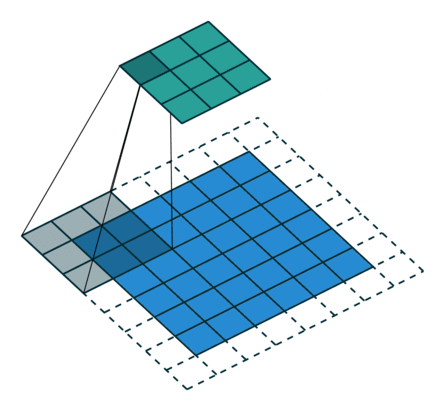


## 2. Minimal Case <a name="mini_example"></a>
This section refers to [Dive into Deep Learning](http://courses.d2l.ai/zh-v2/).

First, let's temporarily ignore the channel (the third dimension) and focus on how to process two-dimensional image data and hidden representations. As shown in the figure, the input is a two-dimensional tensor with a height of 3 and a width of 3 (i.e., a shape of \(3 \times 3\)). The height and width of the convolution kernel are both 2, and the shape of the convolution window (or convolution kernel) is determined by the height and width of the kernel (i.e., \(2 \times 2\)).

Two-dimensional cross-correlation operation. The shaded part is the first output element and the input tensor elements and kernel tensor elements used to compute the output: \(0 \times 0 + 1 \times 1 + 3 \times 2 + 4 \times 3 = 19\).

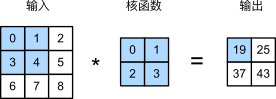

In the two-dimensional cross-correlation operation, the convolution window starts at the top left corner of the input tensor and slides from left to right, top to bottom.
When the convolution window slides to a new position, the part of the tensor contained in that window is element-wise multiplied with the kernel tensor, and the resulting tensor is summed up to get a single scalar value. This value is the output tensor value at that position.
In the example above, the four elements of the output tensor are obtained through the two-dimensional cross-correlation operation, with an output height of 2 and width of 2, as shown below:

\[
\begin{align*}
0 \times 0 + 1 \times 1 + 3 \times 2 + 4 \times 3 &= 19,\\
1 \times 0 + 2 \times 1 + 4 \times 2 + 5 \times 3 &= 25,\\
3 \times 0 + 4 \times 1 + 6 \times 2 + 7 \times 3 &= 37,\\
4 \times 0 + 5 \times 1 + 7 \times 2 + 8 \times 3 &= 43.
\end{align*}
\]

Note that the output size is slightly smaller than the input size. This is because the width and height of the convolution kernel are greater than 1, and the convolution kernel only correlates with each position in the image that fits its size completely.
Thus, the output size is the input size \(n_h \times n_w\) minus the convolution kernel size \(k_h \times k_w\), which is:

\[
(n_h - k_h + 1) \times (n_w - k_w + 1).
\]

This is because enough space is needed to "move" the convolution kernel on the image. Later, we will see how to maintain the output size by padding zeros around the image boundary to ensure enough space for the convolution kernel to move.
Next, we implement the above process in the `corr2d` function, which accepts the input tensor `X` and the convolution kernel tensor `K`, and returns the output tensor `Y`.

In [1]:
## install TensorFlow and tk_r_em
# !pip install tk_r_em

In [4]:
# check if GPU is available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

Num GPUs Available:  1
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16719253754332864525
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2398879744
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4350676363361341392
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


2023-11-11 12:21:22.163693: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 12:21:22.163969: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 12:21:22.164113: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# from d2l import tensorflow as d2l



# Implementing the corr2d function
def corr2d(X, K):
    """Compute 2D cross-correlation."""
    h, w = K.shape
    Y = np.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i, j] = np.sum(X[i: i + h, j: j + w] * K)
    return Y

# Input tensor X and convolution kernel tensor K
X = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
K = np.array([[0, 1], [2, 3]])

# Verifying the output of the 2D cross-correlation operation
corr2d_output = corr2d(X, K)
corr2d_output


array([[19., 25.],
       [37., 43.]])

The output of the 2D cross-correlation operation for the given input tensor \(X\) and convolution kernel tensor \(K\) is as follows:


\begin{bmatrix}
19 & 25 \\
37 & 43
\end{bmatrix}


This matches the expected results from the calculation described earlier, demonstrating the correct implementation of the `corr2d` function.


Convolution layers perform cross-correlation operations on the input and the convolution kernel weights, and then produce the output after adding a scalar bias. Therefore, the two trainable parameters in a convolution layer are the convolution kernel weights and the scalar bias. Just as we randomly initialize the weights in a fully connected layer, we also randomly initialize the convolution kernel weights when training models based on convolution layers.

Based on the `corr2d` function defined above, we [**implement the two-dimensional convolution layer**]. In the `__init__` constructor, `weight` and `bias` are declared as two model parameters. The forward propagation function calls the `corr2d` function and adds the bias.

In [3]:
class Conv2D(tf.keras.layers.Layer):
    def __init__(self):
        super().__init__()

    def build(self, kernel_size):
        initializer = tf.random_normal_initializer()
        self.weight = self.add_weight(name='w', shape=kernel_size,
                                      initializer=initializer)
        self.bias = self.add_weight(name='b', shape=(1, ),
                                    initializer=initializer)

    def call(self, inputs):
        return corr2d(inputs, self.weight) + self.bias

A convolution kernel with a height of \( h \) and a width of \( w \) can be referred to as an \( h $\times$ w \) convolution or \( h $\times$ w \) convolution kernel. Similarly, a convolution layer that uses an \( h $\times$ w \) convolution kernel is called an \( h $\times$ w \) convolution layer.

### Edge Detection of Objects in Images



2023-11-11 12:09:59.403722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 12:09:59.471521: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 12:09:59.471726: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

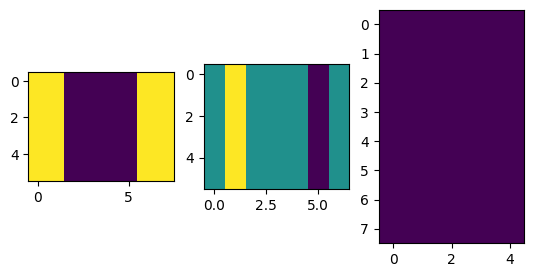

In [4]:
# A simple application of a convolution layer: detecting the edges of different colors in an image
# by identifying the locations of pixel changes.
# First, we construct a 6x8 pixel black and white image.
# The middle four columns are black (0), and the rest of the pixels are white (1).
X = tf.Variable(tf.ones((6, 8)))
X[:, 2:6].assign(tf.zeros(X[:, 2:6].shape))

# Next, we construct a convolution kernel 'K' with a height of 1 and a width of 2.
# When performing the cross-correlation operation, if two horizontally adjacent elements are the same,
# the output is zero; otherwise, the output is non-zero.
K = tf.constant([[1.0, -1.0]])

# Now, we perform the cross-correlation operation on the parameters 'X' (input) and 'K' (convolution kernel).
# The output 'Y' has 1s representing the edge from white to black, and -1s representing the edge from black to white;
# outputs are 0 for other cases.
Y = corr2d(X, K)

# Now we transpose the input two-dimensional image and perform the same cross-correlation operation.
# The output is as follows, where previously detected vertical edges have disappeared.
# As expected, this convolution kernel 'K' can only detect vertical edges, and cannot detect horizontal edges.
Z = corr2d(tf.transpose(X), K)

# Visualization
plt.subplot(131)
plt.imshow(X)
plt.subplot(132)
plt.imshow(Y)
plt.subplot(133)
plt.imshow(Z)


### Learning Kernel Functions

In [8]:
# Construct a two-dimensional convolutional layer with 1 output channel and a kernel of shape (1, 2)
conv2d = tf.keras.layers.Conv2D(1, (1, 2), use_bias=False)

# This two-dimensional convolutional layer uses a four-dimensional input and output format 
# (batch size, height, width, channels), where both batch size and number of channels are 1
X = tf.reshape(X, (1, 6, 8, 1))
Y = tf.reshape(Y, (1, 6, 7, 1))
X = tf.cast(X, tf.float32)
Y = tf.cast(Y, tf.float32)

lr = 3e-2  # Learning rate

Y_hat = conv2d(X)
for i in range(100):
    with tf.GradientTape(watch_accessed_variables=False) as g:
        g.watch(conv2d.weights[0])
        Y_hat = conv2d(X)
        l = (abs(Y_hat - Y)) ** 2
        # Iterate over the convolution kernel
        update = tf.multiply(lr, g.gradient(l, conv2d.weights[0]))
        weights = conv2d.get_weights()
        weights[0] = conv2d.weights[0] - update
        conv2d.set_weights(weights)
        if (i + 1) % 2 == 0:
            print(f'epoch {i+1}, loss {tf.reduce_sum(l):.3f}')
tf.reshape(conv2d.get_weights()[0], (1, 2))


epoch 2, loss 15.787
epoch 4, loss 4.665
epoch 6, loss 1.608
epoch 8, loss 0.608
epoch 10, loss 0.240
epoch 12, loss 0.097
epoch 14, loss 0.039
epoch 16, loss 0.016
epoch 18, loss 0.007
epoch 20, loss 0.003
epoch 22, loss 0.001
epoch 24, loss 0.000
epoch 26, loss 0.000
epoch 28, loss 0.000
epoch 30, loss 0.000
epoch 32, loss 0.000
epoch 34, loss 0.000
epoch 36, loss 0.000
epoch 38, loss 0.000
epoch 40, loss 0.000
epoch 42, loss 0.000
epoch 44, loss 0.000
epoch 46, loss 0.000
epoch 48, loss 0.000
epoch 50, loss 0.000
epoch 52, loss 0.000
epoch 54, loss 0.000
epoch 56, loss 0.000
epoch 58, loss 0.000
epoch 60, loss 0.000
epoch 62, loss 0.000
epoch 64, loss 0.000
epoch 66, loss 0.000
epoch 68, loss 0.000
epoch 70, loss 0.000
epoch 72, loss 0.000
epoch 74, loss 0.000
epoch 76, loss 0.000
epoch 78, loss 0.000
epoch 80, loss 0.000
epoch 82, loss 0.000
epoch 84, loss 0.000
epoch 86, loss 0.000
epoch 88, loss 0.000
epoch 90, loss 0.000
epoch 92, loss 0.000
epoch 94, loss 0.000
epoch 96, loss 0

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 0.9999999, -1.0000002]], dtype=float32)>

### Traditional CNN for Denoising

In this example, we first load the MNIST dataset and normalize the input images. Then, we add Gaussian noise to the test images and clip the resulting noisy images to the range [0, 1]. We define a CNN model that includes several convolutional layers and max-pooling layers, followed by upsampling layers and a final convolutional layer with a sigmoid activation. We compile the model and train it on clean images. Finally, we use the trained model to denoise the noisy test images and visualize the results.

2023-11-11 12:16:52.849445: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-11 12:16:55.378683: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-11 12:16:55.394385: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#

Epoch 1/5


2023-11-11 12:16:56.620243: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8902
2023-11-11 12:16:57.178808: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f2d8ed5cef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-11-11 12:16:57.178842: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-11-11 12:16:57.182444: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-11-11 12:16:57.301758: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


469/469 [==============================] - 6s 8ms/step - loss: 0.1167 - val_loss: 0.0757
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0741 - val_loss: 0.0716
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0714 - val_loss: 0.0699
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0699 - val_loss: 0.0688
Epoch 5/5
313/313 [==============================] - 0s 851us/step


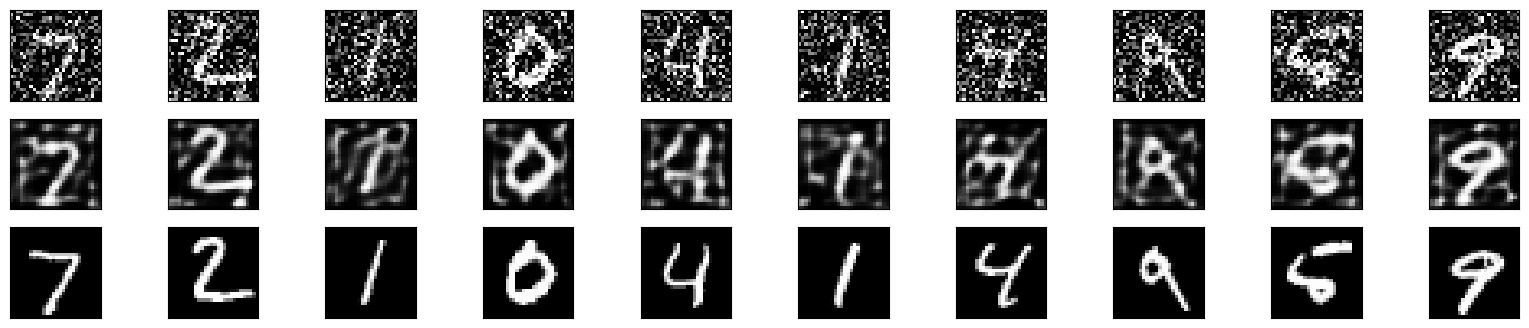

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

# Normalize the input images
train_images = train_images.astype('float32') / 255.
test_images = test_images.astype('float32') / 255.

# Add Gaussian noise to the test images
noise_factor = 0.5
test_images_noisy = test_images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_images.shape)
test_images_noisy = np.clip(test_images_noisy, 0., 1.)

# Define the CNN model for noise removal
model = tf.keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2), padding='same'),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    layers.UpSampling2D((2, 2)),
    layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model on the clean images
model.fit(train_images, train_images, epochs=5, batch_size=128, validation_data=(test_images, test_images))

# Use the model to denoise the noisy test images
denoised_images = model.predict(test_images_noisy)

# Plot the original noisy image, the denoised image, and the ground truth
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original noisy image
    ax = plt.subplot(3, n, i+1)
    plt.imshow(test_images_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Denoised image
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Ground truth
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


## 3: Modern Framework Design <a name="architecture"></a>

### Generative Adversarial Networks (GAN)
GAN, short for Generative Adversarial Network, is a powerful deep learning framework proposed by Ian Goodfellow and his colleagues in 2014. Its goal is to generate realistic data, such as images, text, and audio, by learning from existing data distributions.

The basic idea of GAN is to estimate a generative model through an adversarial process, where two models are trained simultaneously: a generative model G, which captures the data distribution, and a discriminative model D, which estimates the probability that samples come from the training data instead of G. The training process for G aims to maximize the probability of D making errors. This framework corresponds to a minimax two-player game. In any function space for G and D, there exists a unique solution where G recovers the training data distribution, and D equals 1/2 everywhere. When G and D are defined by multilayer perceptrons, the entire system can be trained via backpropagation. No Markov chains or unrolled approximate inference networks are needed during training or generation of samples. Experiments demonstrate the potential of this framework through qualitative and quantitative evaluations.

Compared to traditional convolutional neural networks (CNNs) used for tasks like image classification, GANs offer several advantages:
1. Generating New Data: GANs excel at generating new data that follows the same distribution as the training data. This capability is highly valuable in tasks like image synthesis, where GANs can create realistic images similar to the training set.
2. Unsupervised Learning: Unlike traditional CNNs, GAN training does not require labeled data. They can learn from unlabeled data, discovering patterns and structures within the data distribution on their own.
3. Capturing Complex Patterns: GANs can capture complex patterns in data distributions. They are capable of generating samples with intricate details and diverse outputs, making them well-suited for creative applications.

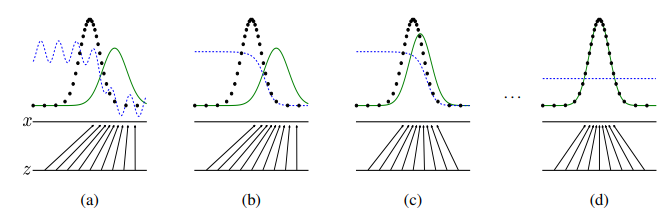

### Residual Dense Network (RDN)

The Residual Dense Network ([Residual Dense Network](https://arxiv.org/abs/1812.10477), RDN) is an advanced deep learning architecture primarily used for image super-resolution and restoration tasks. It was introduced to address the limitations of traditional CNNs in effectively capturing and utilizing feature information.

RDN combines two key concepts: residual learning and dense connections, contributing to its performance improvement. Let's break down these concepts:

1. Residual Learning: Residual learning is based on the idea of learning residual mappings instead of directly learning the desired mapping. In traditional CNNs, each layer learns to approximate the underlying mapping from inputs to outputs. However, as the network gets deeper, the mapping that layers need to learn becomes more challenging. Residual learning addresses this issue by introducing skip connections that allow the network to learn residual mappings. These skip connections enable the network to more effectively retain and propagate important information.
   
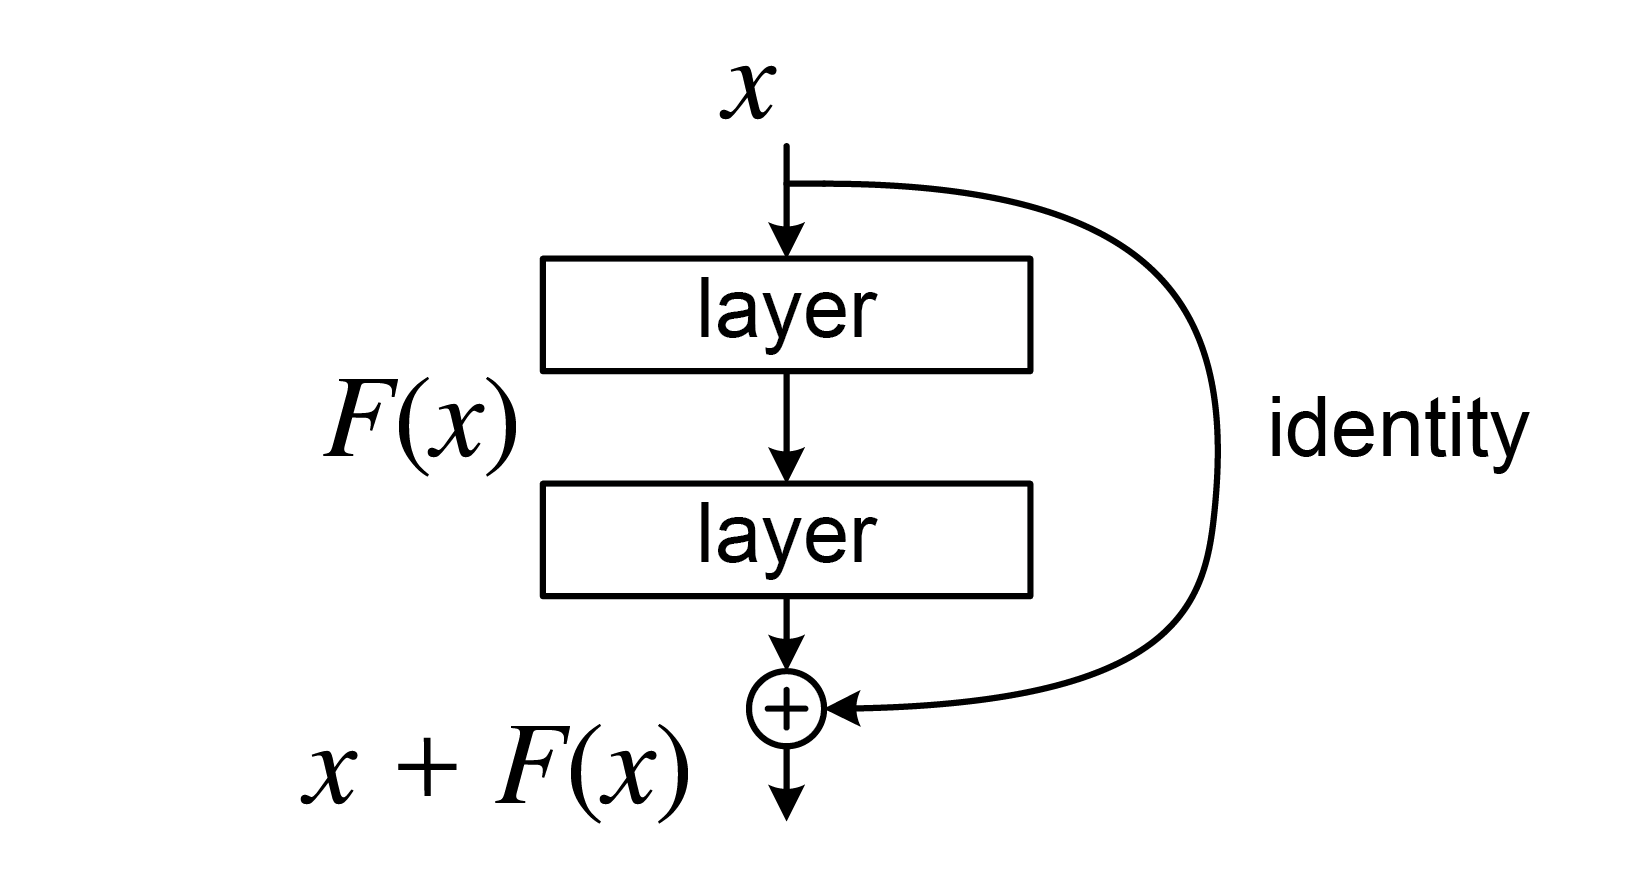

1. Dense Connections: Dense connections aim to enhance feature reuse and information flow within the network. In traditional CNNs, feature maps are usually combined at certain stages through summation or concatenation. Dense connections take this idea further by connecting each layer to every other layer in a feedforward manner. With densely connected layers, early layer feature maps can be directly fed into subsequent layers, facilitating widespread information exchange and enhancing feature reuse. This helps with gradient flow, reduces the vanishing gradient problem, and promotes better utilization of the network's capacity.

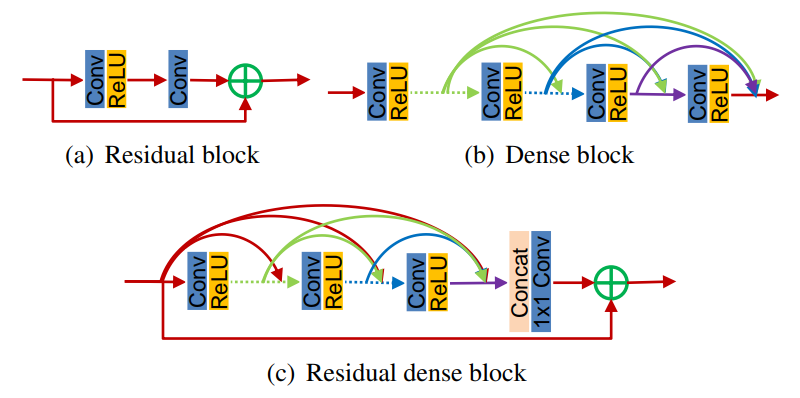

RDN combines residual learning and dense connections, offering several advantages over traditional CNNs:
1. Improved Gradient Flow: The skip connections in residual learning alleviate the vanishing gradient problem by providing direct pathways for gradients to flow back to earlier layers, making the training of deep networks more efficient and stable.
2. Enhanced Feature Reuse: Dense connections promote extensive information exchange between layers, allowing features from early layers to be directly reused by subsequent layers. This leads to richer representations, enabling the network to capture finer details.
3. Deeper Architectures: RDN effectively propagates gradients and promotes feature reuse, making it possible to build deeper networks without performance degradation. Deeper architectures have the potential to capture more complex patterns and achieve better performance.
4. Higher Accuracy: By leveraging residual learning and dense connections, RDN can effectively use available information and learn more powerful representations. This often results in performance superior to that of traditional CNNs, especially in image super-resolution tasks.

Next, we will use GAN to train a better noise removal scheme, where the generator uses a Residual Dense Network.

In [ ]:
from keras.callbacks import learning_rate_schedule
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import os
import sys
from tensorflow.python.ops.numpy_ops import np_config
import numpy as np

# Set verbosity to 0 to suppress output
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np_config.enable_numpy_behavior()
tf.get_logger().setLevel('ERROR')

# Read the data
(train_images, _), (test_images, _) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape the images
train_images = (train_images.astype('float32') / 255.0).reshape(-1, 28, 28, 1)
test_images = (test_images.astype('float32') / 255.0).reshape(-1, 28, 28, 1)

# Add Gaussian noise to the images
noise_factor = 0.5
train_noisy_images = train_images + noise_factor*tf.random.normal(train_images.shape, mean=0.0, stddev=1.0)
train_noisy_images = np.clip(train_noisy_images, 0., 1.)
test_noisy_images = test_images + noise_factor*tf.random.normal(test_images.shape, mean=0.0, stddev=1.0)
test_noisy_images = np.clip(test_noisy_images, 0., 1.)

# Define the RDN (Generator) architecture
def residual_dense_block(x, growth_rate=8, num_layers=4):
    previous_x = x  # Store the input tensor to be used for the residual connection
    filters = x.shape[-1]  # Retrieve the number of filters
    for _ in range(num_layers):
        y = layers.Conv2D(growth_rate, (3, 3), padding='same', activation='relu')(x)
        x = layers.Concatenate()([x, y])
    x = layers.Conv2D(filters, (1, 1), padding='same', activation='relu')(x)  # 1x1 convolution
    x = layers.Add()([previous_x, x])  # Add the residual connection
    return x

# Define the GRDN (Generator) architecture
def group_residual_dense_block(x, num_blocks=3, growth_rate=8, num_layers=3):
    previous_x = x  # Store the input tensor to be used for the residual connection
    for _ in range(num_blocks):
        y = residual_dense_block(x, growth_rate, num_layers)
        x = layers.Concatenate()([x, y])
    x = layers.Conv2D(previous_x.shape[-1], (1, 1), padding='same', activation='relu')(x)  # 1x1 convolution
    x = layers.Add()([previous_x, x])  # Add the residual connection
    return x

def generator():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    
    # Initial convolutional layer followed by downsampling
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    
    # Cascading residual dense blocks (GRDBs)
    x = group_residual_dense_block(x, num_blocks=2, growth_rate=8, num_layers=2)
    
    # Upsampling using transposed convolution
    x = layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.Conv2D(1, (3, 3), padding='same')(x)
    
    return tf.keras.Model(inputs, x)

# Define the discriminator architecture
def discriminator():
    inputs = tf.keras.Input(shape=(28, 28, 1))
    
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same')(inputs)
    x = layers.LayerNormalization(axis=[1, 2])(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same')(x)
    x = layers.LayerNormalization(axis=[1, 2])(x)
    x = layers.LeakyReLU(alpha=0.2)(x)
    
    x = layers.Conv2D(1, (3, 3), padding='same')(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1, activation='sigmoid')(x)
    return tf.keras.Model(inputs, x)


# Create instances of the generator and discriminator models
gen_model = generator()
disc_model = discriminator()

# Compile the models
disc_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0002), loss='binary_crossentropy')
gen_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')


# Set the discriminator to be non-trainable during GAN training
disc_model.trainable = False

# Define the GAN model
gan_input = tf.keras.Input(shape=(28, 28, 1))
gan_output = disc_model(gen_model(gan_input))
gan_model = tf.keras.Model(gan_input, gan_output)
gan_model.compile(optimizer='adam', loss='binary_crossentropy')

# Training loop
batch_size = 64
epochs = 5

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for batch in range(train_images.shape[0] // batch_size):
        real_images = train_images[batch * batch_size : (batch + 1) * batch_size]
        noisy_images = train_noisy_images[batch * batch_size : (batch + 1) * batch_size]

        # Suppress output during training
        sys.stdout = open(os.devnull, 'w')

        # Train the discriminator
        disc_loss_real = disc_model.train_on_batch(real_images, tf.ones((batch_size, 1)))
        disc_loss_fake = disc_model.train_on_batch(gen_model.predict(noisy_images), tf.zeros((batch_size, 1)))
        disc_loss = 0.5 * tf.add(disc_loss_real, disc_loss_fake)

        # Train the generator (combined GAN model)
        gen_loss = gan_model.train_on_batch(noisy_images, tf.ones((batch_size, 1)))

        # Restore output
        sys.stdout = sys.__stdout__
        # Print the progress
        if batch % 100 == 0:
            print(f"Batch {batch+1}/{train_images.shape[0] // batch_size} | Disc Loss: {disc_loss} | Gen Loss: {gen_loss}")

    # Generate denoised images for visualization
    denoised_images = gen_model.predict(test_noisy_images)


    # Display the original noisy image, denoised image, and ground truth image

    n = 10  # Number of images to display
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # Display the original noisy image
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(test_noisy_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title("Noisy Image")

        # Display the denoised image
        ax = plt.subplot(3, n, i + n + 1)
        plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title("Denoised Image")

        # Display the ground truth image
        ax = plt.subplot(3, n, i + 2 * n + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        # ax.set_title("Ground Truth")

    plt.show()

## 4: Applications in Electron Microscopy <a name="EM_application"></a>
Advanced materials require characterization of atomic-level structures and compositions on sub-angstrom scales to understand their properties from a fundamental physical perspective. However, a significant challenge is the electron beam-induced damage to materials, often necessitating the use of low-dose electron imaging. Low doses, combined with instrumental noise, make quantitative analysis of images difficult.

Dr. Ivan Lobato developed a method based on Deep Convolutional Neural Networks (DCNNs) [Article Link](https://arxiv.org/abs/2303.17025v1) for restoring single-shot electron microscopy images. Modern electron microscopes, such as Scanning Electron Microscopes (SEM), Scanning Transmission Electron Microscopes (STEM), and Transmission Electron Microscopes (TEM), have made significant technological advances. However, the quality of experimental images obtained from these instruments is often affected by random and deterministic distortions originating from the instruments or their environments. These distortions can occur during the image acquisition, transmission, or reproduction processes.

The authors discussed the main sources of distortion in TEM and S(T)EM images, develops models to describe these distortions, and proposes a method using convolutional neural networks to correct them. By demonstrating the effectiveness of the method on various experimental images, the author proves that this approach can significantly improve the signal-to-noise ratio, thereby increasing the amount of quantitative structural information extractable from the images. Overall, these findings provide a powerful framework for improving the quality of electron microscopy images and advancing structural analysis and quantification in the fields of materials science and biology.

### Network Architecture
GAN (Generative Adversarial Network) is a powerful framework that encourages predictions to closely resemble undistorted data distributions, thus ensuring realism. A GAN consists of a generator (G) and a discriminator (D) that compete against each other in an adversarial game. The generator learns to produce outputs that appear realistic, while the discriminator learns to differentiate between real and generated data. These models are trained together in an adversarial manner, with improvements in the discriminator aimed at reducing the generator's ability and vice versa. GAN involves generating conditional data, which is fed into the generator and/or discriminator.

#### Generator Architecture
The generator architecture, called the Cascaded Grouped Residual Dense Network (CGRDN), is shown in the figure. This architecture is an extended version of GRDN used in image denoising, which ranked first in the NTIRE2019 Image Denoising Challenge in terms of Peak Signal-to-Noise Ratio (PSNR) and Structural Similarity Index.

While it has been proven that an architecture developed for a specific image restoration task can also perform well for other restoration tasks, the architecture for a given task will depend on the data. When applied to EM data, we found it necessary to make two modifications to the GRDN to better handle data characteristics involving high correlations between pixels, different types and levels of distortion:

1. Replacing the cascading part of GRDN with feature concatenation, feature fusion, and semi-global residual connections. This allows for the global use of hierarchical features, which is vital for highly correlated pixels extending over large areas of the image.

2. Removing the Convolutional Block Attention Module (CBAM) from the network. This is due to the use of larger image sizes (256x256) in the training process, which reduced the effectiveness of CBAM.

#### Discriminator Architecture
The purpose of the discriminator network is to assess the quality of the output data generated by the generator network, as shown in figure (c). We used the convolutional block discriminator described in [the source] with some minor modifications. The zero-padding layers were removed, and batch normalization layers were replaced with instance normalization layers (IN).

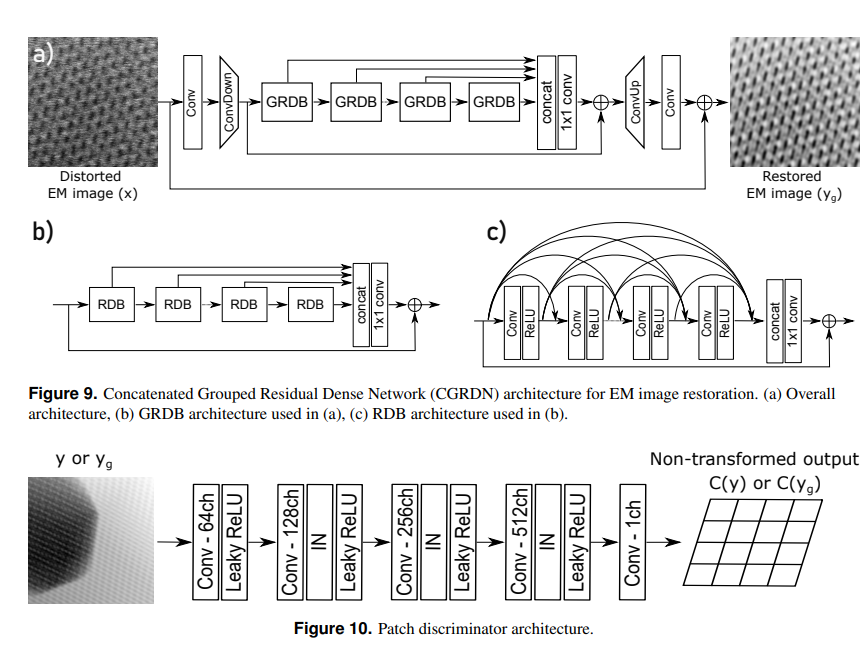

### Sample Generation
Our goal is to train a neural network to correct distortions in electron microscopy images without needing specific knowledge of the samples or microscope settings. Therefore, we only need to generate undistorted images that closely resemble real electron microscopy data and accurately simulate the distortions of electron microscopes. The generated undistorted images should also include physical parameters of the samples and microscope settings, such as atomic size, interatomic distances, lattice parameters, relative intensities of atomic species, acceleration voltage, aberrations, magnification, detector sensitivity, detector angles, and the transfer function of the detection system.

To optimize the simulation process, we generate samples that fully cover the expanded simulation box size. This is an extended version of the required simulation box

 size. Sample generation is divided into three steps. The first step is to randomly select the sample type: crystalline, amorphous, or individual points. The second step involves choosing the orientation of the sample: zone-axis or random orientation. The generation of crystalline samples involves selecting atomic types, space groups, and lattice parameters, as well as randomly generating atomic positions. The generation of amorphous samples involves selecting atomic types and randomly generating atomic positions. The generation of individual points involves selecting the number of points and randomly generating their positions. The third step is to add a supporting layer, which can be crystalline or amorphous, and then the generated atoms are added to the specimen.

The process of generating low-resolution images begins with randomly selecting a set of low-resolution image types. The chosen type can be from the following options: soft particles, sharp particles, granules, banding, grains, and cracks. This stage uses the "individual points" sample type to generate different objects that will be placed at random positions. Finally, by linearly superimposing these individual objects, a low-resolution image is obtained.

### Noise Model
The TEM noise model is based on the fact that TEM images are recorded using parallel illumination, and most electron signal acquisition setups are such that the detector output is proportional to the time-averaged flux of electrons reaching the detector. In TEM, electrons are converted into photons by indirect use of Charge-Coupled Device (CCD) sensors or Complementary Metal-Oxide Semiconductor (CMOS) sensors, then guided to CCD/CMOS sensors through lenses or fiber-optic couplers. Conversely, for direct electron detectors, CMOS sensors are directly exposed to the electron beam.

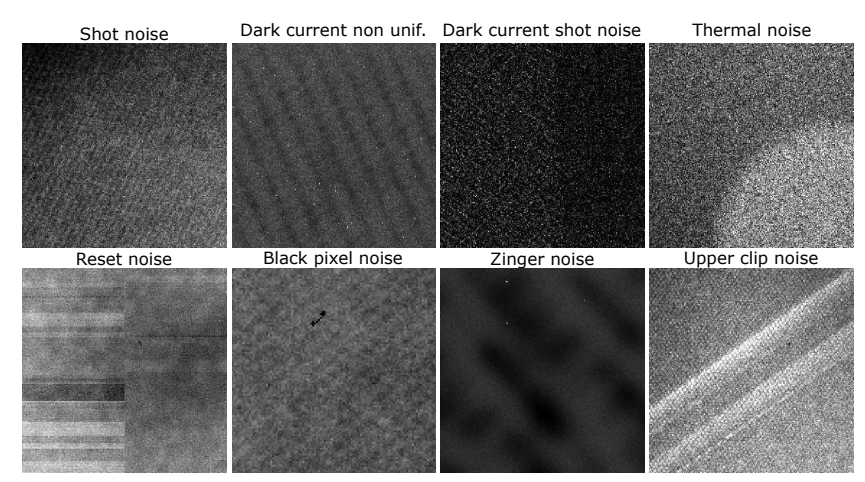

STEM images are formed pixel-by-pixel through scanning lines on the sample at a constant dwell time, referred to as dwell time. The size of each square pixel in physical space is determined by the magnification. The scanning direction is known as the fast/row scanning direction. For traditional scanning modes, the scan starts from the top left corner and, after scanning a row of n pixels, the electron probe moves to the first pixel of the next line. The time required to move the beam to the start position of the scan line is typically called the flyback time. Inaccuracies in beam position during scanning lead to characteristic scanning line/jitter distortions. Although technical improvements in high-performance STEM designs have made every effort, these distortions still affect the process of extracting quantitative information from the sample in recorded images.

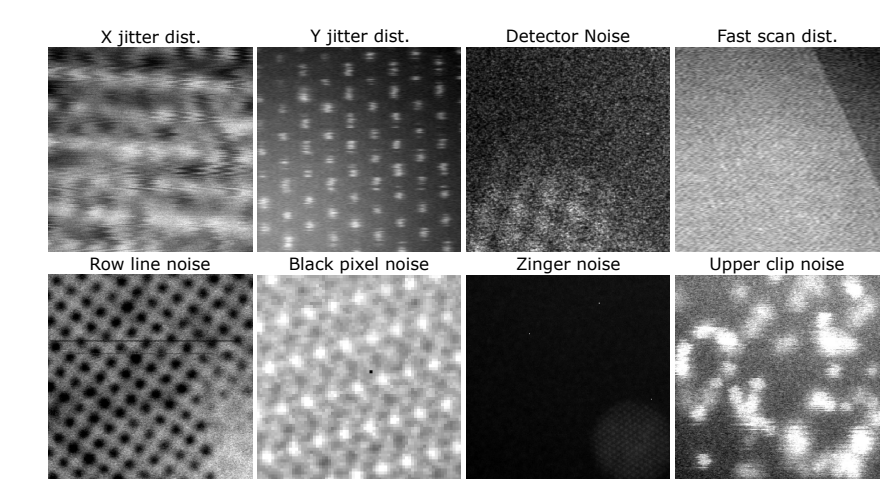

Post-processing distortions are typically added after image recording. These distortions, such as interpolation and blurring, can nonlinearly affect the noise in the image. Post-processing distortions can also include annotations and cropping, which replace part of the original image. Ideally, the recovery process should preserve these distortions. Interpolation distortions may occur when a user applies a transformation function to the image before image restoration. This could be to make the image suitable for further post-processing or to better visualize areas of interest. Interpolation distortions can be modeled by applying random transformations (e.g., random linear transformation matrices) to the training image pairs.

<!-- ![TEM_noise](/data/img/TEM_noise.png)
![STEM_noise](/data/img/STEM_noise.png) -->

In [ ]:
# View network framework
from tk_r_em import load_network
net_name = 'sfr_lrtem'
r_em_nn = load_network(net_name)
r_em_nn.summary()

Let's do the restoration for EM!

2023-11-11 12:39:40.752638: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.17GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


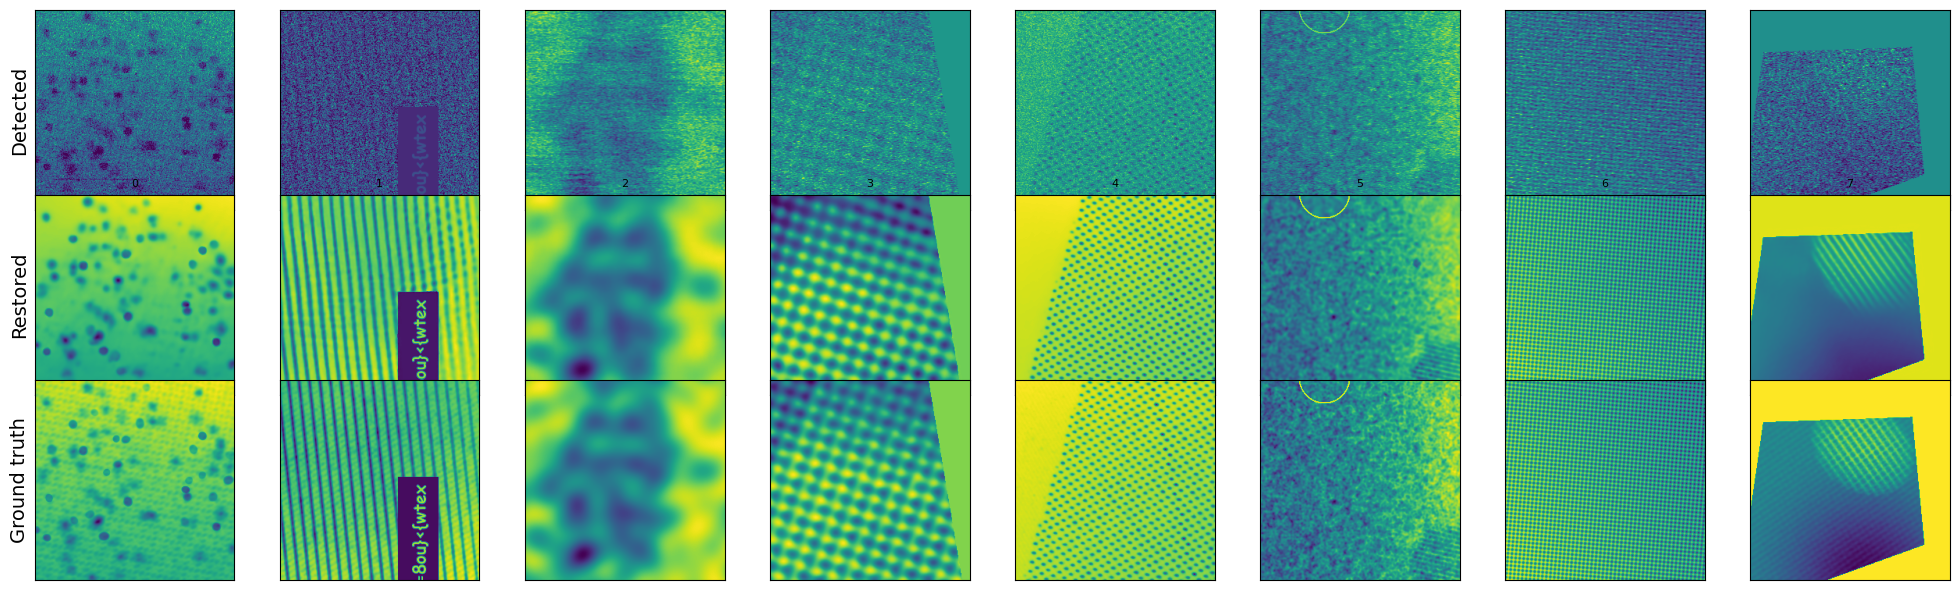

In [9]:
import matplotlib.pyplot as plt
from tk_r_em import load_network, load_sim_test_data


"""
Perform inference on test data using a pre-trained model and visualize the results.
"""
# select one of the available networks from [sfr_hrsem, sfr_lrsem, sfr_hrstem, sfr_lrstem, sfr_hrtem, sfr_lrtem]
net_name = 'sfr_hrstem'

# load its corresponding data
x, y = load_sim_test_data(net_name)

# load its corresponding model
r_em_nn = load_network(net_name)

n_data = x.shape[0]
batch_size = 8

# run inference
y_p = r_em_nn.predict(x, batch_size)

fig, axs = plt.subplots(3, n_data, figsize=(20, 6))

for ik in range(n_data):
    x_ik = x[ik, :, :, 0].squeeze()
    y_p_ik = y_p[ik, :, :, 0].squeeze()
    y_ik = y[ik, :, :, 0].squeeze()

    ir = 0
    axs[ir][ik].imshow(x_ik, cmap='viridis')
    axs[ir][ik].set_xticks([])
    axs[ir][ik].set_yticks([])
    axs[ir][ik].grid(False)
    
    if ik == 0:
        axs[ir][ik].set_ylabel(f"Detected", fontsize=14, )

    ir = 1
    axs[ir][ik].imshow(y_p_ik, cmap='viridis')
    axs[ir][ik].set_xticks([])
    axs[ir][ik].set_yticks([])
    axs[ir][ik].grid(False)

    if ik == 0:
        axs[ir][ik].set_ylabel(f"Restored", fontsize=14)
    axs[ir][ik].set_title(f'{ik}', fontsize=8)
    
    ir = 2
    axs[ir][ik].imshow(y_ik, cmap='viridis')
    axs[ir][ik].set_xticks([])
    axs[ir][ik].set_yticks([])
    axs[ir][ik].grid(False)

    if ik == 0:
        axs[ir][ik].set_ylabel(f"Ground truth", fontsize=14)

plt.subplots_adjust(hspace=2, wspace=10)
plt.tight_layout()
plt.savefig(f"restored_{net_name}.png", format='png')

## Evaluating the Performance of Pretrained CNNs for Image Restoration

Evaluating the performance of pretrained Convolutional Neural Networks (CNNs) for image restoration involves comparing the restored images produced by the network with their corresponding clear images. Several metrics can be used to quantify the differences between the restored and clear images, including Mean Squared Error (MSE), Peak Signal-to-Noise Ratio (PSNR), and Structural Similarity Index (SSIM).

To assess the performance of a pretrained CNN for image restoration, you need a dataset containing pairs of distorted and clear images. The distorted images are input into the network to produce restored images, which are then compared with their corresponding clear images using one or more of the aforementioned metrics.

The results obtained from these metrics can be used to evaluate the performance of the pretrained CNN. Higher PSNR and SSIM values and lower MSE values indicate better performance. It's also common to visually inspect the restored images to subjectively assess their quality.

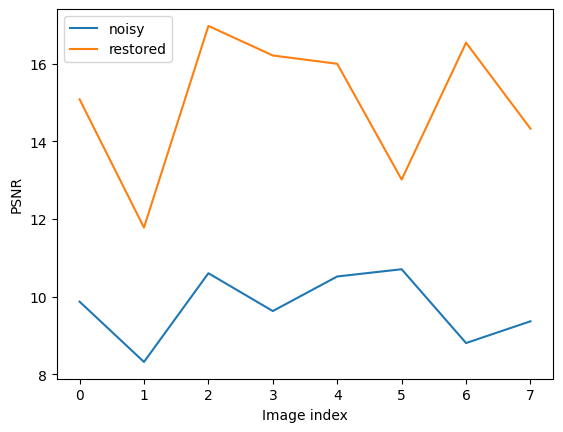

In [10]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = max(img1.max(), img2.max())
    psnr = 10 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

psnr_noise_list = []
psnr_restored_list = []
for ik in range(n_data):
    x_ik = x[ik, :, :, 0].squeeze()
    y_p_ik = y_p[ik, :, :, 0].squeeze()
    y_ik = y[ik, :, :, 0].squeeze()

    psnr_noise_list.append(psnr(x_ik, y_ik))
    psnr_restored_list.append(psnr(y_p_ik, y_ik))

plt.plot(psnr_noise_list, label='noisy')
plt.plot(psnr_restored_list, label='restored')
plt.xlabel('Image index')
plt.ylabel('PSNR')
plt.legend()


/tmp/ipykernel_408367/634677656.py:10: UserWarning: Setting data_range based on im1.dtype. data_range = 4294967295. Please specify data_range explicitly to avoid mistakes.
  ssim_noise_list.append(ssim(x_ik, y_ik))
/tmp/ipykernel_408367/634677656.py:11: UserWarning: Setting data_range based on im1.dtype. data_range = 4294967295. Please specify data_range explicitly to avoid mistakes.
  ssim_restored_list.append(ssim(y_p_ik, y_ik))


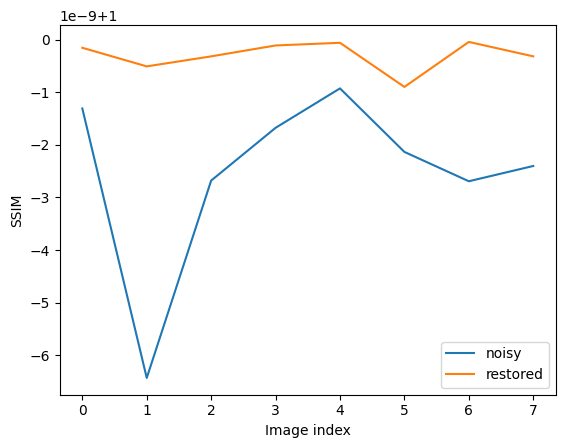

In [11]:
from skimage.metrics import structural_similarity as ssim
import numpy as np
ssim_noise_list = []
ssim_restored_list = []
for ik in range(n_data):
    x_ik = x[ik, :, :, 0].squeeze().astype(np.int32)
    y_p_ik = y_p[ik, :, :, 0].squeeze().astype(np.int32)
    y_ik = y[ik, :, :, 0].squeeze().astype(np.int32)

    ssim_noise_list.append(ssim(x_ik, y_ik))
    ssim_restored_list.append(ssim(y_p_ik, y_ik))

plt.plot(ssim_noise_list, label='noisy')
plt.plot(ssim_restored_list, label='restored')
plt.xlabel('Image index')
plt.ylabel('SSIM')
plt.legend()


### Evaluating Model Performance at the Atomic Scale Using Physical Quantities

The article demonstrates the effectiveness of image denoising in an ideal setting, studying the precision of determining atomic column positions and scattering cross sections (SCS) under various signal-to-noise ratios (SNR) of pure Poisson noise. This setup allows for comparison with the theoretical variance upper limit of unbiased estimators, known as the Cramer-Rao Lower Bound (CRLB). The simulated Scanning Transmission Electron Microscopy (STEM) dataset represents a Pt crystal in the [001] direction, containing 75 depth-section STEM images with a unit cell spacing in the z-direction of 1.

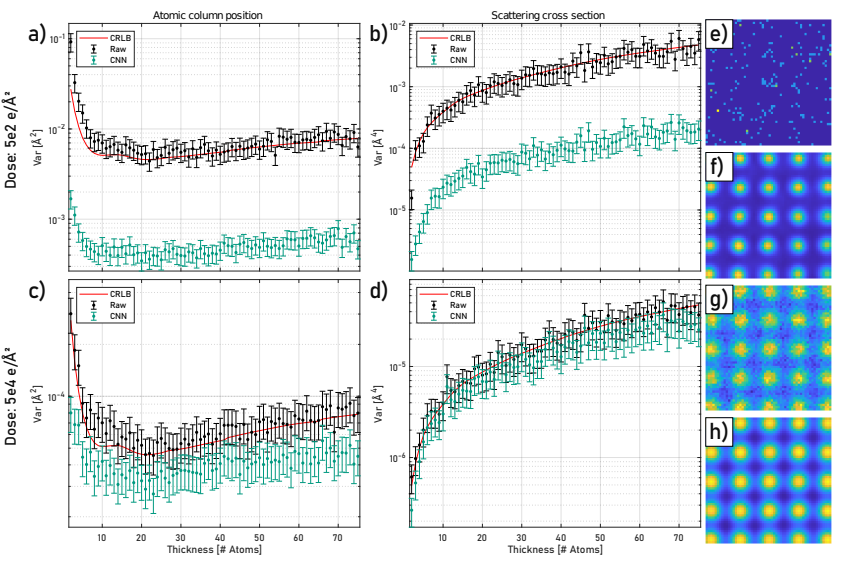

Choosing a more realistic example, including irregularities in the crystal, to determine the impact of a combination of noise, scanning line distortion, and fast scan distortion. In this case, the mean absolute error (MAE) of atomic column positions and the mean absolute percentage error (MPE) of atomic column SCS, as well as the variance of these measurements, are evaluated. This is intended to particularly demonstrate the method's independence from the structural periodicity of atomic-resolution STEM images.

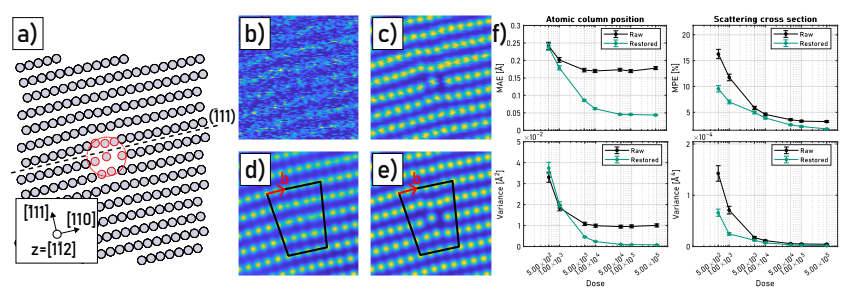

For simulated Pt nanoparticles, it is shown that distortion correction not only enables more accurate positioning of atomic columns but also allows for more reliable atomic counting.

Finally, we will use our model to denoise real electron microscopy images. Below is our first discovery of a new "zebra" precipitation phase, ζ(AgAl), in Al-Ag alloys. This phase exhibits a unique long-range ordered structure, composed of alternating densely-packed planes of aluminum and silver. [Article Link](https://doi.org/10.1016/j.actamat.2017.04.061)

2023-11-11 12:38:34.243097: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.79GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


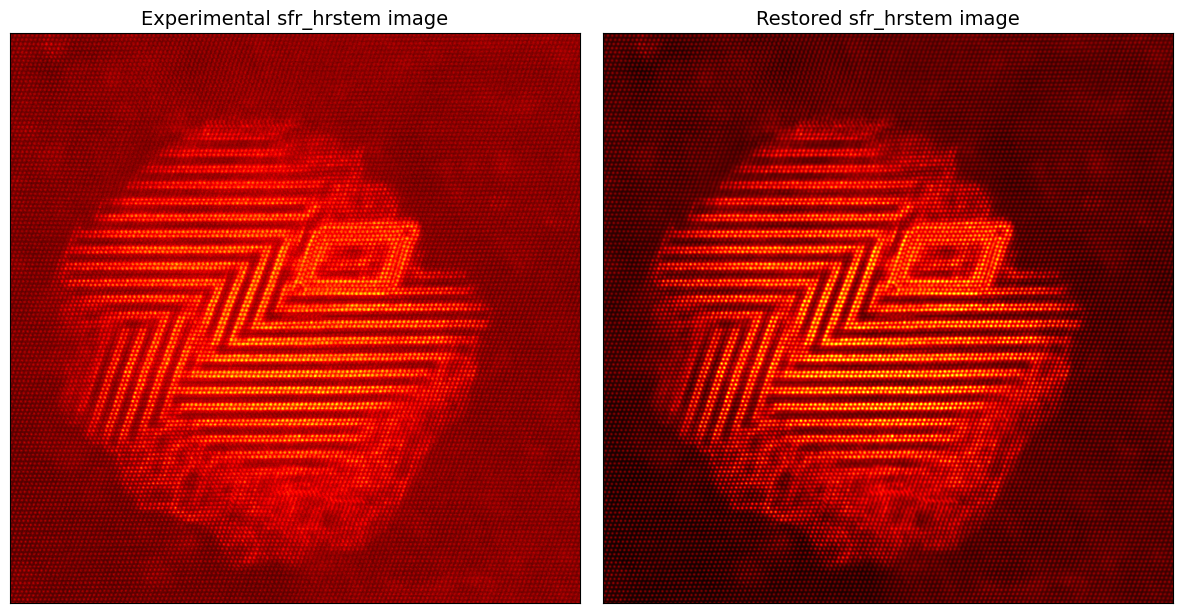

In [8]:
from tk_r_em import load_network, load_hrstem_exp_test_data

"""
Perform inference on test data using a pre-trained model and visualize the results.
"""
# select one of the available networks from [sfr_hrsem, sfr_lrsem, sfr_hrstem, sfr_lrstem, sfr_hrtem, sfr_lrtem]
net_name = 'sfr_hrstem'

# load experimental hrstem data
x = load_hrstem_exp_test_data('sgl_exp_hrstem')
    
# load its corresponding model
r_em_nn = load_network(net_name)
# r_em_nn.summary()

# run inference
y_p = r_em_nn.predict_patch_based(x, patch_size=256, stride=128, batch_size=16)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ir = 0
axs[ir].imshow(x, cmap='hot')
axs[ir].set_xticks([])
axs[ir].set_yticks([])
axs[ir].grid(False)
axs[ir].set_title(f"Experimental {net_name} image", fontsize=14, )

ir = 1
axs[ir].imshow(y_p, cmap='hot')
axs[ir].set_xticks([])
axs[ir].set_yticks([])
axs[ir].grid(False)
axs[ir].set_title(f"Restored {net_name} image", fontsize=14)

plt.subplots_adjust(hspace=2, wspace=10)
plt.tight_layout()
plt.savefig(f"img/restored_Zebra.png", format='png',dpi=600)
plt.show()

## Summary
- Unlike fully connected multilayer perceptrons, convolutional neural networks leverage the translational invariance and locality in image data, allowing them to train efficient models with fewer parameters.
- Convolutional neural networks comprise the following basic operations and parameters: convolution (cross-correlation) operation, pooling, stride, padding, multiple channels.
- Minimum case study: Training a CNN for noise addition and noise removal on a handwritten digit dataset.
- Framework design: Generative Adversarial Networks (GANs) and Residual Dense Networks (RDNs) enhance denoising performance.
- Using pre-trained CNN models for denoising simulated and experimental electron microscopy images, and evaluating their effectiveness.

## Think more
- If unnatural features are observed in your experimental data after processing with the aforementioned CNNs, what could be the reasons and how should they be addressed?
- Is it feasible to use [diffusion models](https://arxiv.org/abs/2006.11239) for denoising practices? What are the potential advantages and challenges?

